# Assignment 1

Due by 11:59pm Sept. 18, 2023

## Theory Questions (Question 1: 9 points, Question 2: 4 points, Question 3: 12 points)

***

1.Suppose `I` is a 5$\times$5 image, `K` is a 3$\times$3 convolving kernel. Compute the convolution of the image `I` with `K`, with the given settings.

`I`:
![q1_i-3.png](attachment:q1_i-3.png)

`K`:
![q1_k.png](attachment:q1_k.png)

a) Zero padding, stride $=1$.

b) Zero padding, stride $=2$.

b) No padding, stride $=1$.

**Answer:**

2.Let `I` be the input. Write the output using average pooling with $2\times2$ kernel, stride $=2$.

`I`:
![q2.png](attachment:q2.png)

**Answer:**

3.`I` is a $5\times5$ RGB image. `K` is a $3\times3$ convolving kernel with all its weights equal to $-1$. `b` is the bias equal to $1$.

The `R` channel is given as
![q3_r.png](attachment:q3_r.png)

The `G` channel is given as
![q3_g.png](attachment:q3_g.png)

The `B` channel is given as
![q3_b.png](attachment:q3_b.png)

Please calculate the convolution of `I` with `K` and `b`, where stride $=1$, and no padding is applied.

**Answer:**

## Programming Questions (Question 4: 45 points, Question 5, 30 points)

4.Load mnist dataset. Normalize the data. Split the data into training, validation and testing set.

Build a CNN network with convolution layers, pooling layers to classify the number.  

Plot the training loss and validation loss as a function of epochs.

Plot the both training accuracy and validation accuracy as a function of epochs.

Print the testing accuracy.

**Note:** Initial code has been provided to import the necessary packages and load the dataset. Now that we have introduced PyTorch programming, you should use it to solve the programming problems in this assignment.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils as utils
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
training_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testing_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

**Splitting the data into training, validation and testing set.**

In [3]:
# Split the training data into training and validation sets
train_size = int(0.8 * len(training_data))
val_size = len(training_data) - train_size
train_data, val_data = torch.utils.data.random_split(training_data, [train_size, val_size])

# Define data loaders for training, validation, and testing
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(dataset=val_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=testing_data, batch_size=batch_size, shuffle=False)

In [4]:
classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

**Visualizing the MNIST Data**

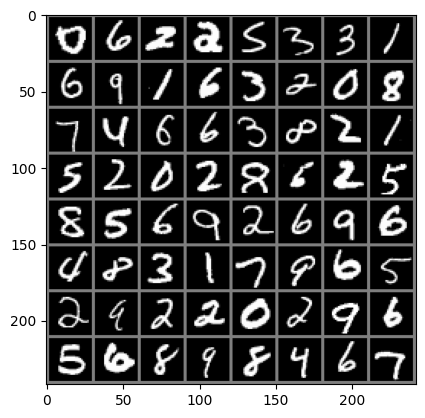

0     6     2     2     5     3     3     1     6     9     1     6     3     2     0     8     7     4     6     6     3     8     2     1     5     2     0     2     8     6     2     5     8     5     6     9     2     6     9     6     4     8     3     1     7     9     6     5     2     9     2     2     0     2     9     6     5     6     8     9     8     4     6     7    


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

**Building a CNN network with convolution layers, pooling layers to classify the number.**

In [6]:
import numpy as np
import os
import torch
from torchvision.datasets import mnist
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import torch.nn.functional as F

class cnnModelMnist(nn.Module):
    def __init__(self):
        super(cnnModelMnist, self).__init__()
        self.convolution1 = nn.Conv2d(1, 10, kernel_size=5)
        self.relu1 = nn.ReLU()
        self.pooling1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.relu2 = nn.ReLU()
        self.pooling2 = nn.MaxPool2d(2)
        self.fullYConnected1 = nn.Linear(320,50)
        self.relu3 = nn.ReLU()
        self.fullYConnected2 = nn.Linear(50,10)

    def forward(self, X):
        Y = self.convolution1(X)
        Y = self.relu1(Y)
        Y = self.pooling1(Y)
        Y = self.conv2(Y)
        Y = self.relu2(Y)
        Y = self.pooling2(Y)

        Y = Y.view(-1,320)
        Y = self.fullYConnected1(Y)
        Y = self.relu3(Y)
        Y = self.fullYConnected2(Y)   # Add softmax activation in the last layer
        return F.softmax(Y, dim=1)


**Training the Model**

In [7]:
# Create an instance of the CNN model
model = cnnModelMnist()

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1,momentum=0.5)

trainingLossPerEpoch=[]
validationLoss=[]
trainingAccuracy=[]
validationAccuracy=[]

# Training loop
num_epochs = 10

for epoch in range(num_epochs):
    # Training
    model.train()
    trainingLoss=0

    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        trainingLoss+=loss.item()

        loss.backward()
        optimizer.step()

    trainingLossPerEpoch.append(trainingLoss/len(train_loader))

    # Validation
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    print(f"Epoch {epoch + 1}, Loss: {trainingLoss / len(train_loader)}")

    val_accuracy = 100 * val_correct / val_total
    validationAccuracy.append(val_accuracy)
    val_loss /= len(val_loader)
    validationLoss.append(val_loss)
    print(f'Validation - Epoch [{epoch + 1}/{num_epochs}], Loss: {val_loss:.4f}, Accuracy: {val_accuracy:.2f}%')

    # Testing
    model.eval()
    test_correct = 0
    test_total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()

    test_accuracy = 100 * test_correct / test_total
    trainingAccuracy.append(test_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], Testing Accuracy: {test_accuracy:.2f}%')


Epoch 1, Loss: 1.7435832873980204
Validation - Epoch [1/10], Loss: 1.5972, Accuracy: 86.52%
Epoch [1/10], Testing Accuracy: 86.91%
Epoch 2, Loss: 1.587383009115855
Validation - Epoch [2/10], Loss: 1.5835, Accuracy: 87.78%
Epoch [2/10], Testing Accuracy: 88.08%
Epoch 3, Loss: 1.5796491680145264
Validation - Epoch [3/10], Loss: 1.5785, Accuracy: 88.27%
Epoch [3/10], Testing Accuracy: 88.49%
Epoch 4, Loss: 1.5751411714553833
Validation - Epoch [4/10], Loss: 1.5867, Accuracy: 87.44%
Epoch [4/10], Testing Accuracy: 88.15%
Epoch 5, Loss: 1.5727823853492737
Validation - Epoch [5/10], Loss: 1.5754, Accuracy: 88.55%
Epoch [5/10], Testing Accuracy: 89.04%
Epoch 6, Loss: 1.5706103035608927
Validation - Epoch [6/10], Loss: 1.5726, Accuracy: 88.78%
Epoch [6/10], Testing Accuracy: 89.16%
Epoch 7, Loss: 1.568898099263509
Validation - Epoch [7/10], Loss: 1.5722, Accuracy: 88.81%
Epoch [7/10], Testing Accuracy: 89.13%
Epoch 8, Loss: 1.5669142255783082
Validation - Epoch [8/10], Loss: 1.5728, Accuracy: 

**Plotting the training loss and validation loss as a function of epochs.**

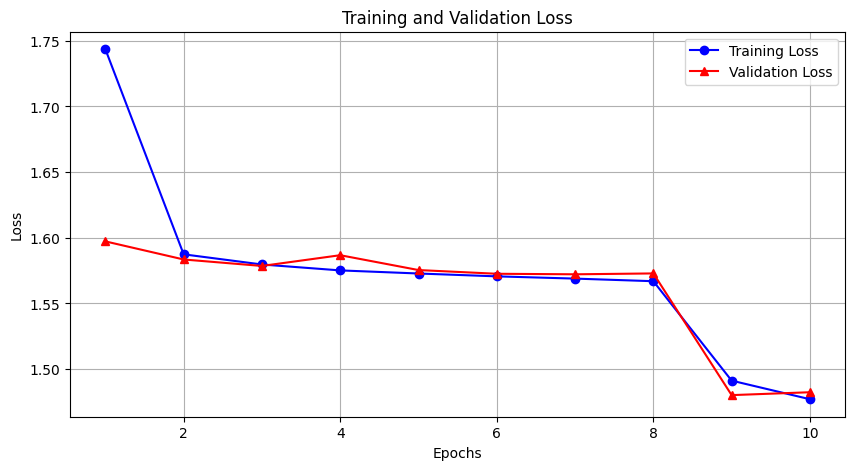

In [8]:
import matplotlib.pyplot as plt

# Generate x-axis values for the number of epochs (assuming 10 epochs for this example)
epochs = range(1, len(trainingLossPerEpoch) + 1)

# Plot both training and validation losses on the same graph
plt.figure(figsize=(10, 5))
plt.plot(epochs, trainingLossPerEpoch, 'bo-', label='Training Loss')
plt.plot(epochs, validationLoss, 'r^-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)  # Add a grid to the plot

plt.show()


**Plotting the both training accuracy and validation accuracy as a function of epochs.**

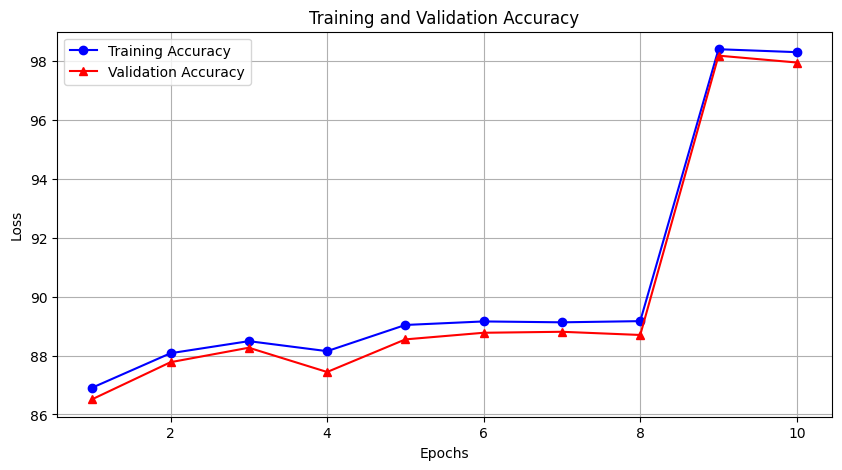

In [19]:
import matplotlib.pyplot as plt

# Generate x-axis values for the number of epochs (assuming 10 epochs for this example)
epochs = range(1, len(trainingAccuracy) + 1)

# Plot both training and validation losses on the same graph
plt.figure(figsize=(10, 5))
plt.plot(epochs, trainingAccuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validationAccuracy, 'r^-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)  # Add a grid to the plot

plt.show()


**Printing the testing accuracy.**

In [10]:
# Test the model on the test set
model.eval()
test_correct = 0
test_total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = 100 * test_correct / test_total
print(f'Test Accuracy: {test_accuracy:.2f}%')

Test Accuracy: 98.31%


5.Load cifar10 dataset. Build a CNN network with convolution layers to classify the images.

Print the accuracy.  

Tune the hyper parameters if needed to get a good accuracy.

In [11]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
training_data = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_data = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)


# Define data loaders for training, validation, and testing
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=training_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [12]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

**Visualizing CIFAR Images**

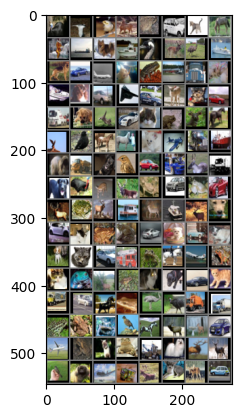

In [13]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))

**Building a CNN Model**

In [16]:
import torch.nn as nn
import torch.nn.functional as F

class cnnModelCifar(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, Y):
        Y = self.pool(torch.relu(self.conv1(Y)))
        Y = self.pool(torch.relu(self.conv2(Y)))
        Y = self.pool(torch.relu(self.conv3(Y)))
        Y = Y.view(-1, 256 * 4 * 4)
        Y = torch.relu(self.fc1(Y))
        Y = torch.relu(self.fc2(Y))
        Y = self.fc3(Y)
        return Y

**Training the Model**

In [17]:
net = cnnModelCifar()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-4)

num_epochs = 30

for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

Epoch 1, Loss: 1.755714118633124
Epoch 2, Loss: 1.2965571737045523
Epoch 3, Loss: 1.079439023266668
Epoch 4, Loss: 0.9701212522623789
Epoch 5, Loss: 0.9086884133651129
Epoch 6, Loss: 0.8597058794077705
Epoch 7, Loss: 0.8204974402552065
Epoch 8, Loss: 0.793979315730312
Epoch 9, Loss: 0.7665376702080602
Epoch 10, Loss: 0.7304171362648839
Epoch 11, Loss: 0.7192467390118963
Epoch 12, Loss: 0.7120498531614728
Epoch 13, Loss: 0.6956175131261196
Epoch 14, Loss: 0.6940276148679007
Epoch 15, Loss: 0.6746263864552579
Epoch 16, Loss: 0.670946637230456
Epoch 17, Loss: 0.6578538263087992
Epoch 18, Loss: 0.6690518383479789
Epoch 19, Loss: 0.6554133236560675
Epoch 20, Loss: 0.6564165467343976
Epoch 21, Loss: 0.6514219840621704
Epoch 22, Loss: 0.6592623583800957
Epoch 23, Loss: 0.6499155025043146
Epoch 24, Loss: 0.6430757141784024
Epoch 25, Loss: 0.6381173649864733
Epoch 26, Loss: 0.649080531371524
Epoch 27, Loss: 0.6279272964543394
Epoch 28, Loss: 0.6203379390184837
Epoch 29, Loss: 0.626432319660016


**Printing Test and Train Accuracy**

In [18]:
def calculate_accuracy(dataloader):
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in dataloader:
            inputs, labels = data
            outputs = net(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return (100 * correct / total)

# Calculate and print train and test accuracy
train_accuracy = calculate_accuracy(train_loader)
test_accuracy = calculate_accuracy(test_loader)

print(f"Train Accuracy: {train_accuracy}%")
print(f"Test Accuracy: {test_accuracy}%")

Train Accuracy: 79.484%
Test Accuracy: 75.28%
